# CISC873 - A1
### Submitted by: **Jagmeet Singh** 
* Date: October 19, 2020

**Data Description:**
1. The data set contains the profile of two persons in an speed dating event. The data is in numeric and categorial format. The task is to predict whether it would be a match based on the data of two people. So the target variable is the 'match' and other columns are used as features. It is a binary classification problem with final result is the probability of match which lies in [0,1].
2. The data set is unbalanced which means the training data-set has more data for one particular target value (0 in this case) and less data for 1 target value.
3. There are lot of missing values which needs to be filled using different imputing methods.
4. The metric used for evaluation is the ROC (Receiver operating characteristic
) curve. More the area under the ROC curve, more good is our model.

**Preprocesssing Techniques**
1. Imputing: Filling the missing value with one of the defined method(constant, mean, median, mode etc.)
2. One Hot Encoding: Converting columns with string value to categorical features.
3. Standard Scalar: Making data with zero mean and scaling to unit variance.
4. Removing columns with only one unique value.
**Hyperparameter Tuning**\
The hyperparameters for different models and preprocessing techniques are calculated using hyperparameter search algorithms. A small description is given for all the hyperparameters in the comments. The algorithms use different hyperparameter configurations provided by user and return the best accuracy parameters.\
The algorithms used for hyparameter searching are : 
1. Grid Search
2. Random Search
3. Bayesian Optimization

The runtime and performance for each method is also discussed.\
**Models Used**
1. Support Vector Machine
2. XGBOOST
3. Random Forest
4. Multilayer perceptron
5. Logistic Regression

SVM is used to compare different search methods time and performance.\
I used Random Search for all other methods.\
 Different parameter space is used in all other methods to find the optimized value.\
 **XGBOOST performs best in case of score at the Public Leaderboard**

In [ ]:
# if you haven't installed xgboost on your system, uncomment the line below
!pip install xgboost
# if you haven't installed bayesian-optimization on your system, uncomment the line below
!pip install scikit-optimize

In [ ]:
#Mounting google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()  #Set aesthetic parameters in one step.
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

from sklearn.metrics import roc_curve, auc

#Data to pandas dataframe
df_train = pd.read_csv('drive/My Drive/CISC873/A1/train.csv')
df_test = pd.read_csv('drive/My Drive/CISC873/A1/test.csv')

# Data Exploration

In [ ]:
#Checking columns and names
df_train.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=192)

In [ ]:
#no. of columns
print('train columns')
print(len(df_train.columns))

print('test columns')
print(len(df_test.columns))

train columns
192
test columns
191


In [ ]:
#Data dimensions (rows, columns)
print(df_train.shape)
print(df_test.shape)

(5909, 192)
(2469, 191)


In [ ]:
#Checking each column data type
df_train.dtypes

gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
             ...   
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
id            int64
Length: 192, dtype: object

In [ ]:
#checking columns with NaN values
df_train.columns[df_train.isnull().any()]

Index(['positin1', 'pid', 'int_corr', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=181)

In [ ]:
#calculating total NaN values for each column
df_train.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

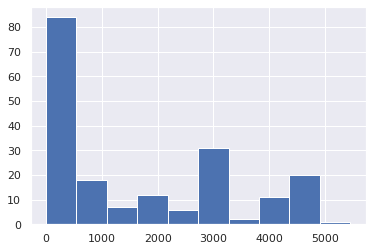

In [ ]:
#to check distribution of columns with NaN number
#x: no of NaN values
#y: no. of columns
df_train.isnull().sum().hist()


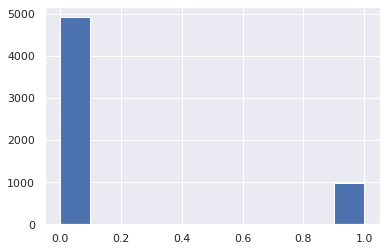

In [ ]:
#distribution of match
df_train['match'].hist

In [ ]:
df_train['match'].nunique()

2

In [ ]:
df_train['id'].nunique()

5909

In [ ]:
#checking count of each value - unbalanced dataset
df_train['match'].value_counts()

0    4921
1     988
Name: match, dtype: int64

# Data Preprocessing

In [ ]:
#features without match column 
X = df_train.drop('match', axis=1)

#ylabel
y = df_train['match']

X_test = df_test.copy()



In [ ]:
#from sklearn.model_selection import train_test_split

#splitting the train data for train and validation data set
#X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2)
X_train = X
y_train = y

In [ ]:
np.shape(X_train)

(5909, 191)

In [ ]:
np.shape(X_test)

(2469, 191)

In [ ]:
#importing libraries
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import FunctionTransformer

In [ ]:
#setting random seed for numpy pseudo-random number generator
np.random.seed(0)

In [ ]:
#making list of features with numeric values
features_numeric = list(X_train.select_dtypes(include=['float64','int64']))
print(features_numeric)
#making list of features without numeric values
features_categorical = list(X_train.select_dtypes(include=['object']))
print(features_categorical)

['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s',

In [ ]:
#checking the shape of data set with all the numeric features
np.shape(df_train.select_dtypes(include=['float64','object','int64']))

(5909, 192)

In [ ]:
#viewing all the columns by their data type
df_train.columns.to_series().groupby(df_train.dtypes).groups

{int64: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order', 'partner', 'match', 'samerace', 'id'], float64: ['positin1', 'pid', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es',

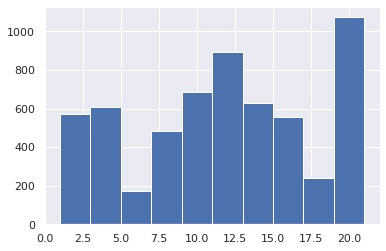

In [ ]:
#distribution of 'wave' feture column
df_train['wave'].hist()

In [ ]:
#id is unique to every user so not a feature
#method to delete 'id' column
def drop_id(X):
    return X.drop(columns=['id'])


In [ ]:
#making a pipeline for features

#for numeric features, filling values with the median of the column
#standard scalar-> transfrom to unit variance
transformer_numeric = Pipeline(
    steps=[
            ('drp',FunctionTransformer(drop_id)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]
)

In [ ]:
#pipeline for categorial features
#'imputer'-> filling missing values with 'missing' string
#'onehot'-> Encode categorical features as a one-hot numeric array
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [ ]:
#defining the process which defines to which columns the transformation
#need to be applied
#transformer_numeric -> numeric features and transformer_categorical -> features_categorical

preprocessor = ColumnTransformer(
    transformers=[         
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)


# Models

## Model 1: SVM

In [ ]:
#Support Vector Machine
from sklearn import svm

* Comparing performance by keeping the param grid same for each method

In [ ]:
#defining the full pipeline which includes 
# 1.) preprocessing on columns
# 2.) defining the classifier for the problem

full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', svm.SVC(probability=True))
    ]
)

In [ ]:
#Defining the parameters need to be varied
param_grid = {
    'preprocessor__num__imputer__strategy': ['median','mean'],
   # 'my_classifier__kernel': ['poly', 'rbf'],   #kernel type to be used in the algorithm
    'my_classifier__C': [ 0.1,0.5,2],                   #Regularization parameter(l2)
  #  'my_classifier__gamma': [ 0.001],           #Kernel coefficient for ‘rbf’, ‘poly’
    'my_classifier__probability':[True]         #To enable probability
}



#### Grid Search

In [ ]:
#Grid search with full pipeline, parameter grid, cross validation generator, 
#cv : Determines the cross-validation splitting strategy
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  2.3min finished


best score 0.8386032817659714
best score {'my_classifier__C': 0.1, 'my_classifier__probability': True, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('svm_grid.csv', index=False)
#submission

#### Randomized Search

In [ ]:
#Random Search
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  2.2min finished


best score 0.8386032817659714
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__probability': True, 'my_classifier__C': 0.1}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('svm_rand.csv', index=False)
#submission

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


#### Bayesian Optimization

In [ ]:
from sklearn.svm import SVC

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC())
    ]
)
# SVC has a class_weight attribute for unbalanced data

In [ ]:
# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'preprocessor__num__imputer__strategy': ['median','mean'],
        'my_svc__C': Real(1e+1,1e+2, prior='log-uniform'),
       # 'my_svc__gamma': Real(1e-6,1e+1, prior='log-uniform'),
        #'my_svc__degree': Integer(1,8),
        #'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
        'my_svc__probability':[True]
    },
    n_iter=2,   #Number of parameter settings that are sampled
    random_state=0,
    verbose=1,n_jobs=2
)

bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.3min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.3min finished


BayesSearchCV(cv=None, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('preprocessor',
                                         ColumnTransformer(n_jobs=None,
                                                           remainder='drop',
                                                           sparse_threshold=0.3,
                                                           transformer_weights=None,
                                                           transformers=[('num',
                                                                          Pipeline(memory=None,
                                                                                   steps=[('drp',
                                                                                           FunctionTransformer(accept_sparse=False,
                                                                                                               check_inverse=True,


In [ ]:
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

best score 0.8426129632763582
best score OrderedDict([('my_svc__C', 18.12890870724612), ('my_svc__probability', True), ('preprocessor__num__imputer__strategy', 'median')])


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = bayes_search.predict_proba(df_test)[:,1]
submission.to_csv('svm_bayes.csv', index=False)
#submission

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


#### Comparing different methods

Text(0, 0.5, 'Time (min)')

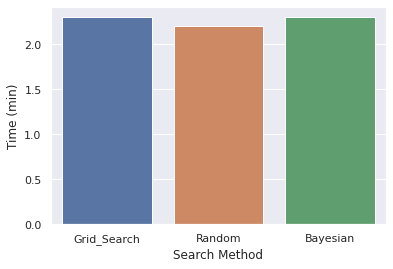

In [ ]:
#Comparing runtime for each search method
method = ['Grid_Search','Random','Bayesian']
time = [2.3,2.2,2.3]
sns.barplot(x = method, y = time)
plt.xlabel("Search Method")
plt.ylabel("Time (min)")

Text(0, 0.5, 'Performance (AUC-ROC)')

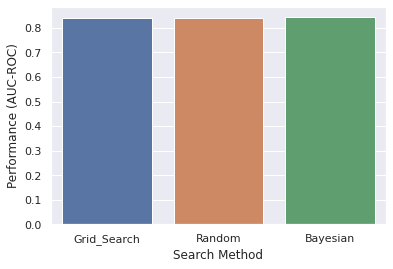

In [ ]:
#Comparing performance for each search method
method = ['Grid_Search','Random','Bayesian']
per = [0.839,0.839,0.843]
sns.barplot(x = method, y = per)
plt.xlabel("Search Method")
plt.ylabel("Performance (AUC-ROC)")

**Random Search took the least time**\
**Bayesian Search method performs best among the other methods but overall the performance is quite similar for all the methods. It may be different while using more parameters setting.**

## Model 2: XGBOOST

In [ ]:
#defining the full pipeline which includes 
# 1.) preprocessing on columns
# 2.) defining the classifier for the problem
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(
            objective='binary:logistic', seed=1))
    ]
)

**Tuning number of estimators, max depth and imputer strategy in the first parameter grid.**

In [ ]:
#parameter grid #1
# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'my_classifier__n_estimators': [ 170, 150, 200,250],       #Number of boosting rounds
    'my_classifier__max_depth':[10,14,18,20],                  #Maximum tree depth for base learners
}



#### Random Search

In [ ]:
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  2.9min finished


best score 0.8712739141388719
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 170, 'my_classifier__max_depth': 14}


**After getting estimated value for imputer, estimators and max depth, other parameters are tuned for better performance.**\
**The regularization parameters and class weight are tuned in the second hyperparameter setting. Number of estimators are also changed to get better accuracy on the test data.**

In [ ]:
#parameter grid #2
# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['median'],
    'my_classifier__n_estimators': [199,200],       #Number of boosting rounds
    'my_classifier__max_depth':[14],                #Maximum tree depth for base learners
    'my_classifier__random_state':[2020],           #random luck
    'my_classifier__reg_lambda':[0.2,0.18,0.22],    #L2 regularization term on weights
    'my_classifier__scale_pos_weight':[0.22,0.24,0.23] #Balancing of positive and negative weights
}


In [ ]:
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  2.9min finished


best score 0.8720474758926793
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__scale_pos_weight': 0.23, 'my_classifier__reg_lambda': 0.2, 'my_classifier__random_state': 2020, 'my_classifier__n_estimators': 200, 'my_classifier__max_depth': 14}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = clf.predict_proba(df_test)[:,1]
submission.to_csv('xgboost_ran_199.csv', index=False)

**XGBOOST perfoms well after second hyperparameter grid tuning. The score is higher on Public Leaderboard (0.89). This may be I have over optimized the model according to the test data set.**

## Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#defining the full pipeline which includes 
# 1.) preprocessing on columns
# 2.) defining the classifier for the problem
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', RandomForestClassifier())
    ]
)

**For first hyperparameters, imputer strategy and number of estimators are tuned.**

In [ ]:
#Parameter Grid #1
# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'my_classifier__n_estimators': [150, 200,250],   #The number of trees in the forest

}



#### Random Search

In [ ]:
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=5, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  3.3min finished


best score 0.8361703146188436
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 250}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('RF_ran_hp_1.csv', index=False)
#submission

**After tuning the above hyperparameters, max_depth, bootstrap and class weight is tuned.**

In [ ]:
#Parameter Grid #2
# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['median'],
    'my_classifier__n_estimators': [250],        #The number of trees in the forest
    'my_classifier__max_depth':[10, 15, 20],              #The maximum depth of the tree
    'my_classifier__bootstrap':[True, False],              #Whether bootstrap samples are used when building trees
    'my_classifier__class_weight':[{1:0.3},{1:0.5},{1:0.1}] #Balancing of positive and negative weights
}


In [ ]:
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=5, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))  #To print best score
print('best score {}'.format(clf.best_params_)) #To print parameter for best score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  3.5min finished


best score 0.8445789815390011
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 250, 'my_classifier__max_depth': 10, 'my_classifier__class_weight': {1: 0.5}, 'my_classifier__bootstrap': False}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('RF_ran_hp_2.csv', index=False)
#submission

**The score increased after tuning the other parameters as expected**

## Model4: Multi Layer Perceptron

In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#defining the full pipeline which includes 
# 1.) preprocessing on columns
# 2.) defining the classifier for the problem

full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', MLPClassifier())
    ]
)

**Tuning imputer and number of hidden layers for first parameter fitting**

In [ ]:
#Hyperparameter space #1
#Defining the parameters need to be varied
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median','mode'],  #imputer strategy
    'my_classifier__hidden_layer_sizes': [450,500,600],         #number of neurons in the hidden layer
}



#### Random Search

In [ ]:
#Random Search
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed: 13.8min finished


best score 0.8322372119176531
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__hidden_layer_sizes': 600}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('mlp_rand_hp_1.csv', index=False)
#submission

**Tuning activation, solver, max_iter for second hyperparameter tuning**

In [ ]:
#Hyperparameter space #2
#Defining the parameters need to be varied
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__hidden_layer_sizes': [600],         #number of neurons in the hidden layer
    'my_classifier__activation':['logistic', 'tanh', 'relu'],   #Activation function for the hidden layer
    'my_classifier__solver': ['adam','sgd'],                    #The solver for weight optimization
    'my_classifier__max_iter':[5000,10000],                     #Maximum number of iterations
    'my_classifier__early_stopping':[True]                      #Whether to use early stopping if model not improving
}

In [ ]:
#Random Search
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=2, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  4.6min finished


best score 0.8398947276536384
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__solver': 'adam', 'my_classifier__max_iter': 5000, 'my_classifier__hidden_layer_sizes': 450, 'my_classifier__early_stopping': True, 'my_classifier__activation': 'tanh'}


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('mlp_rand_hp_2.csv', index=False)
#submission

**The metric score increased with more tuning as expected**

# Model 5: Logistic Regression

In [ ]:
#Logistic Regression from Scikit
from sklearn.linear_model import LogisticRegression

In [ ]:
#defining the full pipeline which includes 
# 1.) preprocessing on columns
# 2.) defining the classifier for the problem

full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', LogisticRegression())
    ]
)

**Tuning imputer strategy and solver for first hyperparameter space**

In [ ]:
#Defining the parameters need to be varied
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','mode'],
    'my_classifier__solver': ['newton-cg','saga'],       #Algorithm to use in the optimization 
}


#### Random Search

In [ ]:
#Random Search
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=3, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:   12.3s finished


best score 0.8497289611796512
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__solver': 'saga'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('lr_rand_hp_1.csv', index=False)
#submission

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


**Tuning penality, max_iter and class_weight for second hyperparameter space**

In [ ]:
#Defining the parameters need to be varied
param_grid = {
    'preprocessor__num__imputer__strategy': ['median'],
    'my_classifier__penalty': ['l1','l2'],               #Used to specify the norm used in the penalization
    'my_classifier__solver': ['saga'],       #Algorithm to use in the optimization problem
    'my_classifier__class_weight': [0.3,0.2],            #Weights associated with classes (good for unbalanced data)
    'my_classifier__max_iter':[2000, 2500]               #Maximum number of iterations taken for the solvers to converge
}


In [ ]:
#Random Search
#Randomized Search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(full_pipline, param_grid, cv=5, verbose=3, n_jobs=2, 
    scoring='roc_auc')
clf.fit(X_train, y_train)


print('best score {}'.format(clf.best_score_))
print('best score {}'.format(clf.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 11.6min
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed: 16.2min finished


best score 0.8596991802564624
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__solver': 'saga', 'my_classifier__penalty': 'l1', 'my_classifier__max_iter': 2500, 'my_classifier__class_weight': 0.2}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['match'] = grid_search.predict_proba(df_test)[:,1]
submission.to_csv('lr_rand_hp_2.csv', index=False)
#submission

**The metric score increased with more tuning as expected**

# Questions:

### Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

Ans: The simple linear regression model fails to incorporate the non-linearlity among the features. On the other hand, the perceptron/logistic regression models incorporates the features non-linear behaviour. In logistic regression, the activation function is the sigmoid function.

### What's a decision tree and how it is different to a logistic regression model?

Ans: 
* Decision tree is an algorithm to predict/classify the data. A decision tree consists of the nodes and each node has branches. Each node represents a feature. The tree starts with the root node and the root node has a feature which contribute most to classify the events. The criteria for branches, cut-off, no. of layers is determined by an algorithm which trains over the data to minimize/maximize the corresponding metric. Thus decision tree divides the space (spanned by features) into small regions.
* Logistic regression fits one line/plane to the data which sometimes fails to fit data with non-linear separatibility.

### We discussed three variants of decision tree in our lecture, what are their differences?

Ans: In Decision Tree, we can introduce Pre-pruning, Early stopping and post-pruning for efficiently use them.
* In Pre-pruning, the tree growth is hindered when there is no statistically significant association between any attribute and the class at a particular node.
* In post-pruning, the tree is bult fully and after that, some tree are pruned/raised using possible strategies.
* In Early-Stopping, the tree growth is stopped when there is no significant increase in the metric score.

### What is the difference between the random forest model, and a bagging ensemble of CART models?

Ans: Ensemble method is a way to combine the results from multiple weak learners to get the final result/prediction.
* In bagging ensemble, the subsets of data-sets are obtained with replacement. Then the CART model is trained on each subset dataset. Fo a new(test) dataset, the final prediction is the average of all the CART models. The number of subsets equals the number of trees.
* Random Forest is an improvement over Bagging. Decision Tree are greedy algorithm and even with bagging, there are lot of correlations between models. In random forest, for each classifiers the number of features are selected randomly at each split point which makes all the weak lerners less correlated.  

### What is the difference between bagging and boosting?


Ans: In an ensemble method, multiple small models (learners) are used to get the final prediction of the data. It is also called learning from weak classifiers. 
* In bagging, the new classifiers are trained using a random selection of new data sets from the main training data set. 
* Whereas, in boosting, the new classifiers are trained using a weighted small data sets from the original data. 
* So in case of boosting, some data is trained more by small learners and in bagging all the data has equal probability of being trained by the weak classifiers.

### How can we use linear models to solve non-linear problem? (two approaches)

* Approach 1: (Feature Mapping) One way to to incorporate non-linearity is to make new feature columns by using the already existing features. This can be done by generating a feature which multiplies two features like f1*f1, taking n power of the feature and applying some other functions to the existing features to generate new features. Other kernal functions can be used like Polynomial, Sigmoid, Radial Basis etc. 

* Approach 2: An another approach would be using multi perceptron model. One perceptron divides the space in one linear hyperplane. Two perceptrons divides the plane in two hyperplanes and thus multilayer perceptron can be used to incorporate non-linearity in the data.


#Downloading PDF

In [ ]:
!sudo apt-get install texlive-xetex


In [ ]:
!ls

CISC873_A1_Jagmeet.ipynb  drive  sample_data


In [ ]:
!jupyter nbconvert --to pdf CISC873_A1_Jagmeet.ipynb

[NbConvertApp] Converting notebook CISC873_A1_Jagmeet.ipynb to pdf
[NbConvertApp] Support files will be in CISC873_A1_Jagmeet_files/
[NbConvertApp] Making directory ./CISC873_A1_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A1_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A1_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A1_Jagmeet_files
[NbConvertApp] Making directory ./CISC873_A1_Jagmeet_files
[NbConvertApp] Writing 109683 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 121914 bytes to CISC873_A1_Jagmeet.pdf
